In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
!pip install Cython


In [24]:
!pip install pystan

Defaulting to user installation because normal site-packages is not writeable


In [26]:
!pip install prophet


Defaulting to user installation because normal site-packages is not writeable


In [2]:
# reading a csv file
data=pd.read_csv(r"D:\youtube project\Crimes_-_2001_to_Present.csv")

In [3]:
data

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8077146,13047495,JG229914,04/18/2023 08:00:00 AM,003XX N JEFFERSON ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,42.0,28.0,11,1172269.0,1902384.0,2023,08/19/2023 03:40:26 PM,41.887589,-87.642827,"(41.887589411, -87.642826595)"
8077147,13168300,JG373901,08/07/2023 06:00:00 PM,0000X W 95TH ST,031A,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,...,9.0,49.0,03,1177527.0,1841973.0,2023,08/19/2023 03:40:26 PM,41.721698,-87.625345,"(41.72169837, -87.625345212)"
8077148,13114024,JG309527,06/20/2023 07:00:00 PM,031XX S AVERS AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,22.0,30.0,07,1151205.0,1883542.0,2023,08/19/2023 03:40:26 PM,41.836324,-87.720674,"(41.836323827, -87.720674149)"
8077149,13188860,JG398340,08/26/2023 12:00:00 AM,078XX S SOUTH SHORE DR,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,7.0,46.0,14,1198338.0,1853426.0,2023,09/02/2023 03:41:45 PM,41.752631,-87.548737,"(41.752631346, -87.548737069)"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077151 entries, 0 to 8077150
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [5]:
##64 The only way to have 'int' type and 'nan' in the same column is to use the 'Int64' type
data['Community Area'] = data['Community Area'].astype({'Community Area' : 'Int64'})

In [6]:
data.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     13087
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614846
Community Area          613470
FBI Code                     0
X Coordinate             88958
Y Coordinate             88958
Year                         0
Updated On                   0
Latitude                 88958
Longitude                88958
Location                 88958
dtype: int64

In [7]:
data.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [8]:
data.shape

(8077151, 22)

In [9]:
#imputation-handled missing value with constant, median 
data['Location Description'].fillna('unknown',inplace=True)
data['District'].fillna('unknown',inplace=True)
data['Ward'].fillna(data['Ward'].median(), inplace=True)
data['Community Area'].fillna(data['Community Area'].median(), inplace=True)

In [10]:
data = data[pd.notnull(data['X Coordinate'])]
data = data[pd.notnull(data['Y Coordinate'])]

In [11]:
data.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [12]:
#data cleaning
#checking duplicates of each column
data.duplicated()

1          False
2          False
3          False
4          False
6          False
           ...  
8077146    False
8077147    False
8077148    False
8077149    False
8077150    False
Length: 7988193, dtype: bool

In [13]:
import datetime

In [14]:
def to_datetime(s):    
    # getting the date, time and moment (AM or PM)
    date, time, moment = s.split(' ')
    
    # getting month, day and year from the date
    month, day, year = date.split('/')
    
    # getting the hour and minute from time
    hour, minute, _ = time.split(':')
    
    # casting to int
    year = int(year)
    month = int(month)
    day = int(day)
    
    hour = int(hour)
    minute = int(minute)
    
    # we round to the next hour if minute > 30
    if minute > 30:
        hour += 1
    
    if hour >= 12:
        hour -= 12
    
    # we create hour between 0 and 24 
    if moment == 'PM':
        hour += 12
    
    return datetime.datetime(year, month, day, hour)

In [15]:
data['Date'] = data['Date'].apply(to_datetime) 

In [16]:
data['Hour'] = data['Date'].apply(lambda datetime : datetime.time().hour)
data['Day'] = data['Date'].apply(lambda datetime : datetime.date().day)
data['Month'] = data['Date'].apply(lambda datetime : datetime.date().month)

In [17]:
data.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Hour                    0
Day                     0
Month                   0
dtype: int64

In [18]:
#changing datetime type
data['Date'] = pd.to_datetime(data.Date,format = '%m/%d/%Y %I:%M:%S %p')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7988193 entries, 1 to 8077150
Data columns (total 25 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              object        
 12  Ward                  float64       
 13  Community Area        Int64         
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int64         
 18  Updated On            object        
 19  Latit

In [21]:
# Converting dataframe to csv file
data.to_csv('crime_analy.csv', index=False)

In [22]:
#Drop the columns that we are not going to use from the dataset
data.drop(['ID','Case Number','IUCR','X Coordinate', 'Y Coordinate','Updated On',
       'Location','FBI Code','Community Area','Beat'],axis=1,inplace=True)

In [23]:
data

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Year,Latitude,Longitude,Hour,Day,Month
1,2021-05-24 15:00:00,020XX N LARAMIE AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,25.0,36.0,2021,41.917838,-87.755969,15,24,5
2,2021-06-26 09:00:00,062XX N MC CORMICK RD,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,17.0,50.0,2021,41.995219,-87.713355,9,26,6
3,2023-11-09 07:00:00,019XX W BYRON ST,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,19.0,47.0,2023,41.952345,-87.677975,7,9,11
4,2023-11-12 08:00:00,086XX S COTTAGE GROVE AVE,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,6.0,6.0,2023,41.737751,-87.604856,8,12,11
6,2023-09-06 17:00:00,002XX N Wells st,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1.0,42.0,2023,41.886018,-87.633938,17,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8077146,2023-04-18 08:00:00,003XX N JEFFERSON ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,12.0,42.0,2023,41.887589,-87.642827,8,18,4
8077147,2023-08-07 18:00:00,0000X W 95TH ST,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,6.0,9.0,2023,41.721698,-87.625345,18,7,8
8077148,2023-06-20 19:00:00,031XX S AVERS AVE,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,10.0,22.0,2023,41.836324,-87.720674,19,20,6
8077149,2023-08-26 00:00:00,078XX S SOUTH SHORE DR,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,4.0,7.0,2023,41.752631,-87.548737,0,26,8


In [24]:
data['Primary Type'].value_counts()

Primary Type
THEFT                                1685852
BATTERY                              1467204
CRIMINAL DAMAGE                       915655
NARCOTICS                             741256
ASSAULT                               530901
OTHER OFFENSE                         497521
BURGLARY                              430903
MOTOR VEHICLE THEFT                   401264
DECEPTIVE PRACTICE                    344971
ROBBERY                               302810
CRIMINAL TRESPASS                     218467
WEAPONS VIOLATION                     115198
PROSTITUTION                           69386
OFFENSE INVOLVING CHILDREN             53902
PUBLIC PEACE VIOLATION                 53047
SEX OFFENSE                            30378
CRIM SEXUAL ASSAULT                    26007
INTERFERENCE WITH PUBLIC OFFICER       18992
LIQUOR LAW VIOLATION                   14977
GAMBLING                               14540
ARSON                                  13741
HOMICIDE                               132

In [26]:
categorical_cols=data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:",categorical_cols)
print("Numerical Variables:",numerical_cols )

Categorical Variables: Index(['Block', 'Primary Type', 'Description', 'Location Description',
       'District'],
      dtype='object')
Numerical Variables: ['Ward', 'Year', 'Latitude', 'Longitude', 'Hour', 'Day', 'Month']


In [27]:
order_data = data['Primary Type'].value_counts().iloc[:15].index
order_data

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT',
       'OTHER OFFENSE', 'BURGLARY', 'MOTOR VEHICLE THEFT',
       'DECEPTIVE PRACTICE', 'ROBBERY', 'CRIMINAL TRESPASS',
       'WEAPONS VIOLATION', 'PROSTITUTION', 'OFFENSE INVOLVING CHILDREN',
       'PUBLIC PEACE VIOLATION'],
      dtype='object', name='Primary Type')

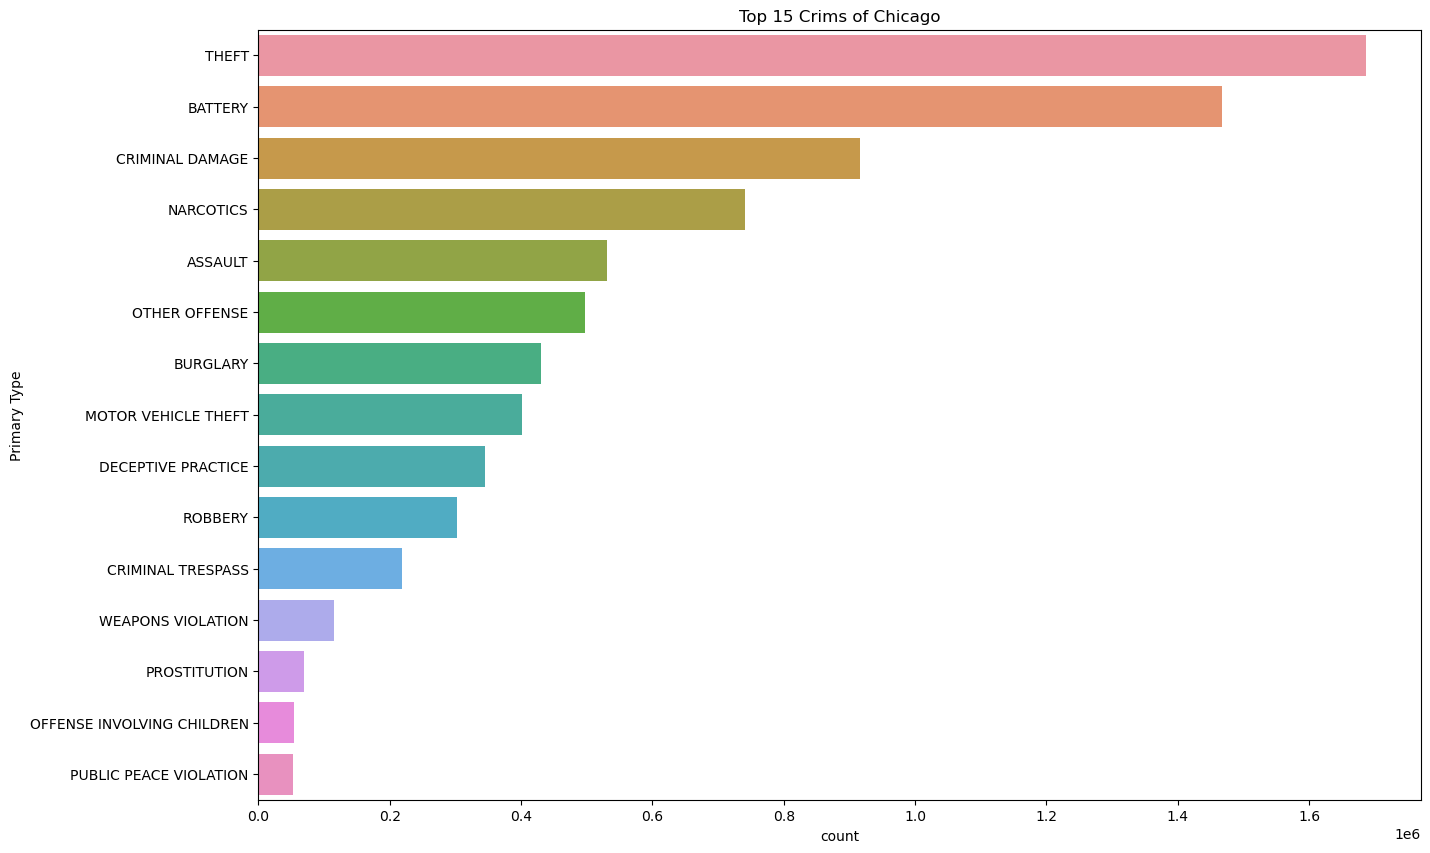

In [28]:
plt.figure(figsize=(15,10))
sns.countplot(y='Primary Type',data=data,order=order_data)
plt.title('Top 15 Crims of Chicago')
plt.xlabel('count')
plt.ylabel('Primary Type')

plt.show()

In [29]:
order_for_location = data['Location Description'].value_counts().iloc[:15].index
order_for_location

Index(['STREET', 'RESIDENCE', 'APARTMENT', 'SIDEWALK', 'OTHER',
       'PARKING LOT/GARAGE(NON.RESID.)', 'ALLEY', 'SMALL RETAIL STORE',
       'SCHOOL, PUBLIC, BUILDING', 'RESIDENCE-GARAGE', 'RESTAURANT',
       'VEHICLE NON-COMMERCIAL', 'RESIDENCE PORCH/HALLWAY', 'DEPARTMENT STORE',
       'GROCERY FOOD STORE'],
      dtype='object', name='Location Description')

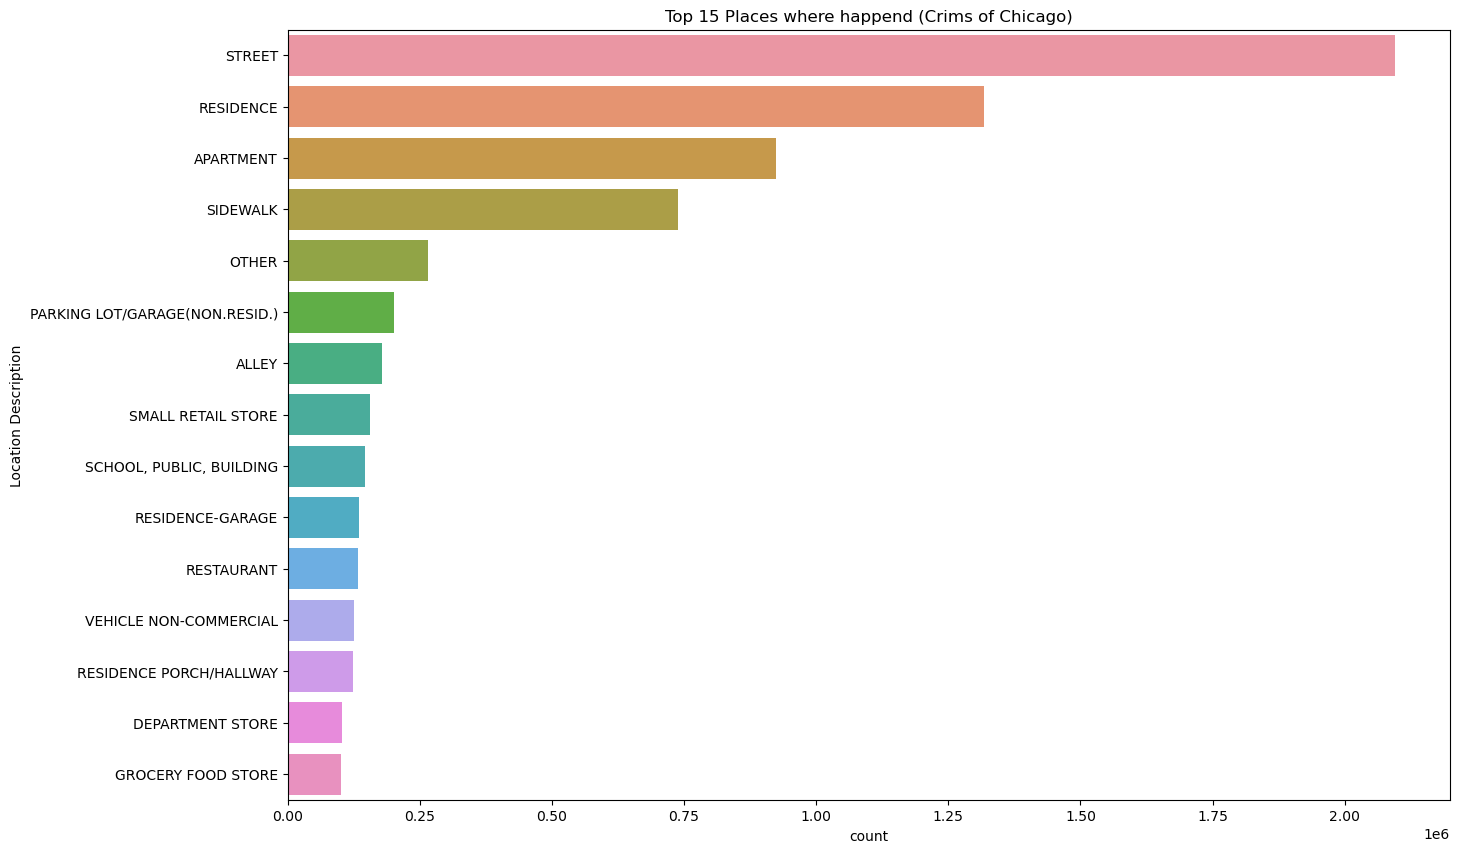

In [30]:
plt.figure(figsize=(15,10))
sns.countplot(y='Location Description',data=data,order=order_for_location)
plt.title('Top 15 Places where happend (Crims of Chicago)')
plt.xlabel('count')
plt.ylabel('Location Description')
plt.show()

In [31]:
data.set_index('Date',inplace=True)

In [32]:
data.head()

,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Year,Latitude,Longitude,Hour,Day,Month
Date,,,,,,,,,,,,,,
2021-05-24 15:00:00,020XX N LARAMIE AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,25.0,36.0,2021,41.917838,-87.755969,15,24,5
2021-06-26 09:00:00,062XX N MC CORMICK RD,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,17.0,50.0,2021,41.995219,-87.713355,9,26,6
2023-11-09 07:00:00,019XX W BYRON ST,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,19.0,47.0,2023,41.952345,-87.677975,7,9,11
2023-11-12 08:00:00,086XX S COTTAGE GROVE AVE,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,6.0,6.0,2023,41.737751,-87.604856,8,12,11
2023-09-06 17:00:00,002XX N Wells st,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1.0,42.0,2023,41.886018,-87.633938,17,6,9


In [33]:
temp = data.resample('Y').size()
temp

Date
2001-12-31    482878
2002-12-31    471531
2003-12-31    472042
2004-12-31    467213
2005-12-31    449930
2006-12-31    445563
2007-12-31    435708
2008-12-31    419898
2009-12-31    385965
2010-12-31    369983
2011-12-31    351303
2012-12-31    335474
2013-12-31    306415
2014-12-31    273777
2015-12-31    257935
2016-12-31    267268
2017-12-31    264965
2018-12-31    263553
2019-12-31    259173
2020-12-31    207955
2021-12-31    202872
2022-12-31    234907
2023-12-31    261675
2024-12-31    100210
Freq: A-DEC, dtype: int64

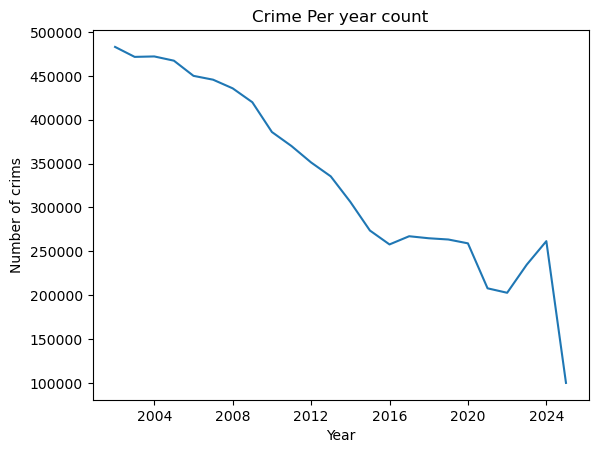

In [34]:
plt.plot(temp)
plt.title('Crime Per year count')
plt.xlabel('Year')
plt.ylabel('Number of crims')
plt.show()

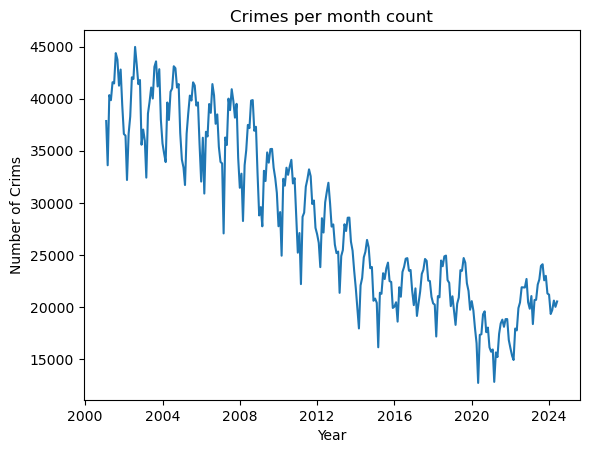

In [35]:

plt.plot(data.resample('M').size())
plt.title('Crimes per month count')
plt.xlabel('Year')
plt.ylabel('Number of Crims')
plt.show()

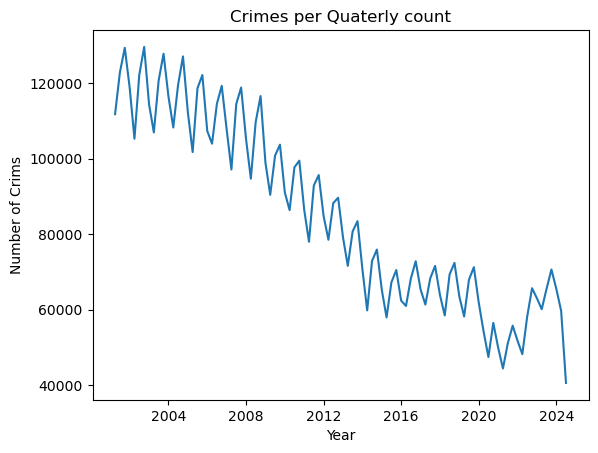

In [36]:
plt.plot(data.resample('Q').size())
plt.title('Crimes per Quaterly count')
plt.xlabel('Year')
plt.ylabel('Number of Crims')
plt.show()

In [38]:
#  Calculate Arrest Rates
def calculate_arrest_rates(data):
    # Overall arrest rate
    overall_arrest_rate = data['Arrest'].mean() * 100

    # Arrest rate by crime type
    arrest_rate_by_crime_type = data.groupby('Primary Type')['Arrest'].mean() * 100

    # Arrest rate by location
    arrest_rate_by_location = data.groupby('Location Description')['Arrest'].mean() * 100

    # Arrest rate by year
    arrest_rate_by_year = data.groupby('Year')['Arrest'].mean() * 100

    return overall_arrest_rate, arrest_rate_by_crime_type, arrest_rate_by_location, arrest_rate_by_year

# Run the calculations
overall_arrest_rate, arrest_rate_by_crime_type, arrest_rate_by_location, arrest_rate_by_year = calculate_arrest_rates(data)
domestic_freq, non_domestic_freq, domestic_arrest_rate, non_domestic_arrest_rate = compare_domestic_non_domestic(data)

# Print the results
print("Overall Arrest Rate: {:.2f}%".format(overall_arrest_rate))
print("Arrest Rate by Crime Type:\n", arrest_rate_by_crime_type)

print("Arrest Rate by Location:\n", arrest_rate_by_location)
print("Arrest Rate by Year:\n", arrest_rate_by_year)


NameError: name 'compare_domestic_non_domestic' is not defined

In [ ]:
def compare_domestic_non_domestic(data):
    # Domestic incidents
    domestic_incidents = data[data['Domestic'] == True]

    # Non-domestic incidents
    non_domestic_incidents = data[data['Domestic'] == False]

    # Characteristics and frequencies
    domestic_freq = domestic_incidents.shape[0]
    non_domestic_freq = non_domestic_incidents.shape[0]

    # Additional characteristics
    domestic_arrest_rate = domestic_incidents['Arrest'].mean() * 100
    non_domestic_arrest_rate = non_domestic_incidents['Arrest'].mean() * 100

    return domestic_freq, non_domestic_freq, domestic_arrest_rate, non_domestic_arrest_rate
print("\nDomestic Incidents: ", domestic_freq)
print("Non-Domestic Incidents: ", non_domestic_freq)
print("Domestic Arrest Rate: {:.2f}%".format(domestic_arrest_rate))
print("Non-Domestic Arrest Rate: {:.2f}%".format(non_domestic_arrest_rate))

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Frequency Bar Chart
ax[0].bar(['Domestic', 'Non-Domestic'], [domestic_freq, non_domestic_freq], color=['pink', 'blue'])
ax[0].set_title('Frequency of Incidents')
ax[0].set_ylabel('Number of Incidents')

# Arrest Rate Bar Chart
ax[1].bar(['Domestic', 'Non-Domestic'], [domestic_arrest_rate, non_domestic_arrest_rate], color=['pink', 'blue'])
ax[1].set_title('Arrest Rates')
ax[1].set_ylabel('Arrest Rate (%)')
plt.show()



In [ ]:
# Selecting crimes that led to an arrest
year_crime_arrest = data[data['Arrest'] == True]['Year'].value_counts().sort_index()

In [ ]:
# Plot the crime rate evolution with the years
plt.figure(figsize=(14, 8), dpi = 80)
year_crime = data['Year'].value_counts().sort_index()
plt.bar(year_crime.index, year_crime.values, width=0.6, color='pink', edgecolor='black')
plt.xticks(year_crime.index)
plt.title('Crime Evolution With Time')
plt.ylabel('Crime count')
plt.xlabel('Year')
plt.show()

In [ ]:
chicago_prohet = data.resample('M').size().reset_index()
chicago_prohet

In [ ]:
chicago_prohet.columns = ['Date','CrimeCount']
chicago_prohet

In [ ]:
chicago_prohet_data = chicago_prohet.rename(columns={'Date':'ds','CrimeCount':'y'})
chicago_prohet_data

In [ ]:
m = Prophet()
m.fit(chicago_prohet_data)

In [ ]:
#Make Predictions
future = m.make_future_dataframe(periods=365)
forcast = m.predict(future)
forcast

In [ ]:
figure = m.plot(forcast,xlabel='Date',ylabel='Crim Rate')

In [ ]:
figure = m.plot_components(forcast)

In [ ]:
future = m.make_future_dataframe(periods=720)
forcast = m.predict(future)
forcast

In [ ]:
figure = m.plot(forcast,xlabel='Date',ylabel='Crim Rate')

In [ ]:
figure = m.plot_components(forcast)

In [ ]:
# Plot the 30 most appearning location type
plt.figure(figsize=(14, 14), dpi = 80)
data['Location Description'].value_counts().head(30).plot(kind='bar', color='blue')
plt.title('Top 30 crime locations')
plt.ylabel('Total count over the past 20 years')
plt.show()

In [ ]:
order_district=data['District'].value_counts().iloc[:15].index

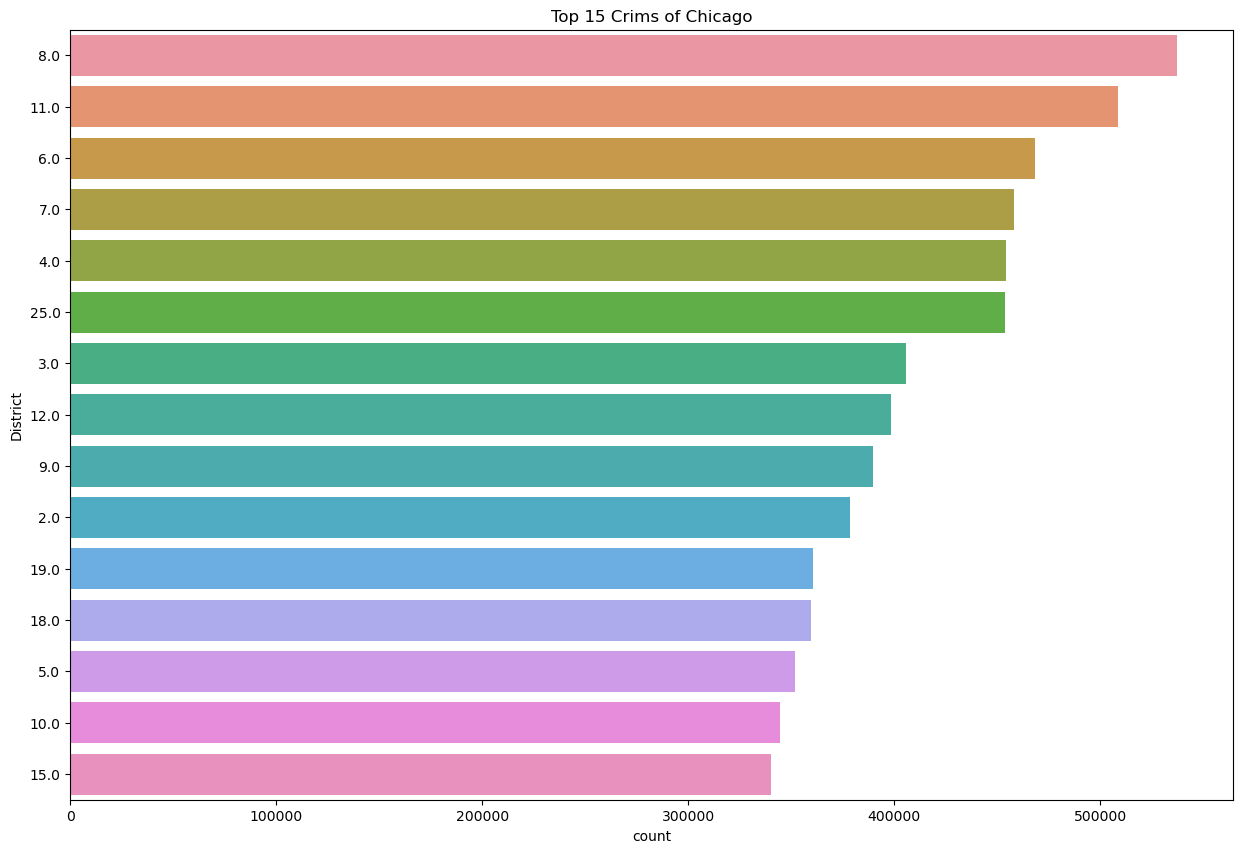

In [69]:
plt.figure(figsize=(15,10))
sns.countplot(y='District',data=data,order=order_district)
plt.title('Top 15 Crims of Chicago')
plt.xlabel('count')
plt.ylabel('District')
plt.show()

In [72]:
# Selecting crimes that led to an arrest
year_crime_arrest = data[data['Arrest'] == True]['Year'].value_counts().sort_index()

In [74]:
year_crime_no_arrest =data[data['Arrest'] == False]['Year'].value_counts().sort_index()

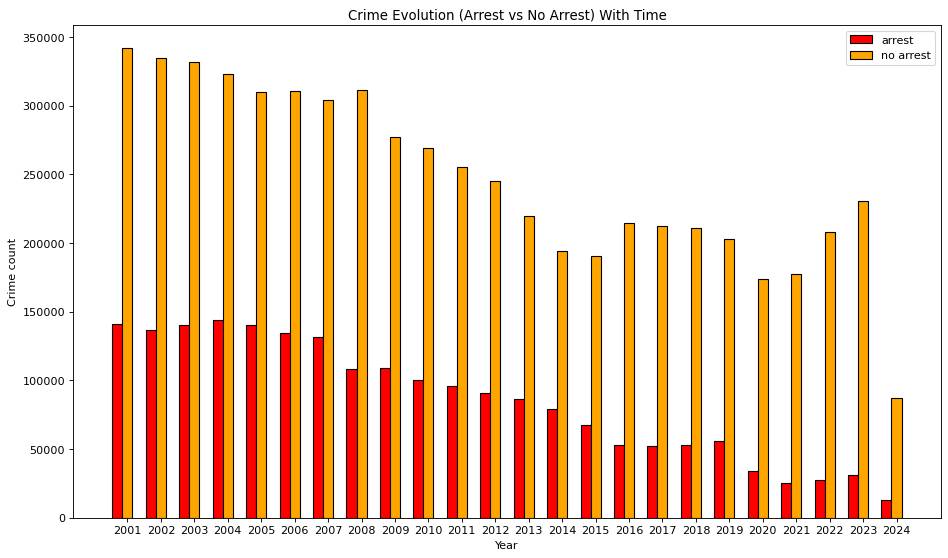

In [76]:
plt.figure(figsize=(14, 8), dpi = 80)
barWidth = 0.3

# Arrest
bars1 = year_crime_arrest.values

# No arrest
bars2 = year_crime_no_arrest.values
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create Arrest bars
plt.bar(r1, bars1, width = barWidth, color = 'red', edgecolor = 'black', capsize=7, label='arrest')
 
# Create No Arrest bars
plt.bar(r2, bars2, width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, label='no arrest')
 
plt.xticks([r + barWidth for r in range(len(bars1))], year_crime_arrest.index)
plt.title('Crime Evolution (Arrest vs No Arrest) With Time')
plt.ylabel('Crime count')
plt.xlabel('Year')
plt.legend()
plt.show()


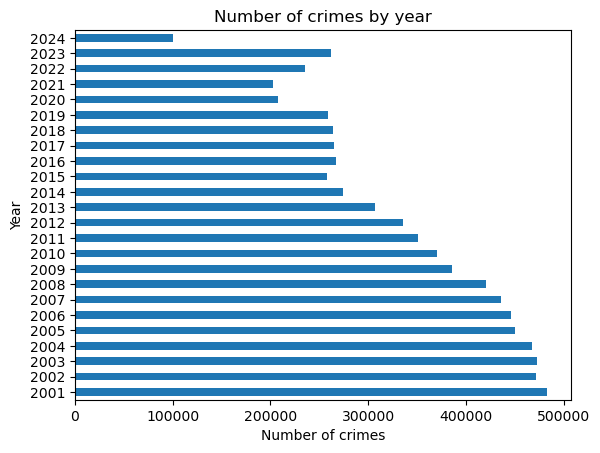

In [78]:
data.groupby([data.Year]).size().plot(kind='barh')
plt.ylabel('Year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by year')
plt.show()

In [80]:
def toMonth(number):
    if number == 1:
        return 'January'
    elif number == 2:
        return 'February'
    elif number == 3:
        return 'March'
    elif number == 4:
        return 'April'
    elif number == 5:
        return 'May'
    elif number == 6:
        return 'June'
    elif number == 7:
        return 'July'
    elif number == 8:
        return 'August'
    elif number == 9:
        return 'September'
    elif number == 10:
        return 'October'
    elif number == 11:
        return 'November'
    elif number == 12:
        return 'December'

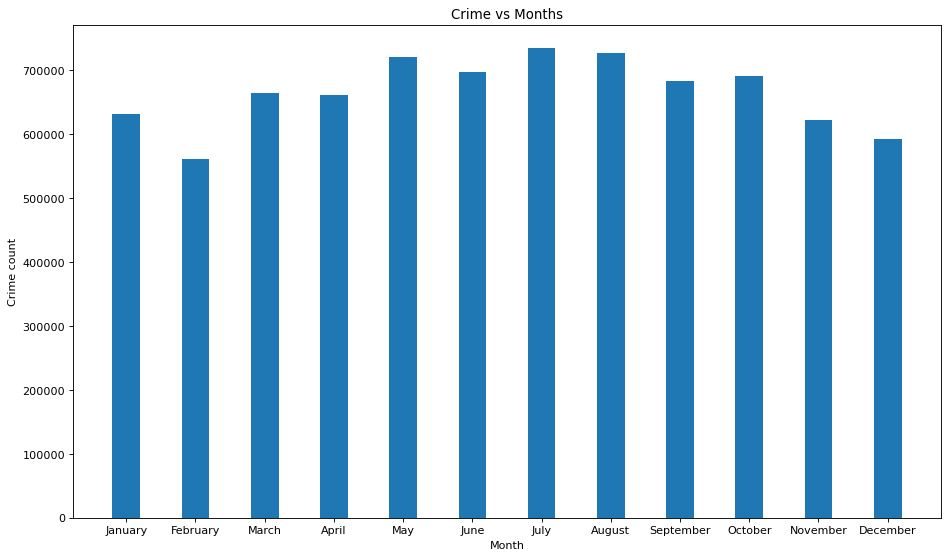

In [83]:
# Plot the crime vs month of the year
plt.figure(figsize=(14, 8), dpi = 80)
month_crime = data['Month'].value_counts().sort_index()
plt.bar(month_crime.index, month_crime.values, width=0.4)
plt.xticks(range(1, len(month_crime.index) + 1), [toMonth(number) for number in month_crime.index])
plt.title('Crime vs Months')
plt.ylabel('Crime count')
plt.xlabel('Month')
plt.show()